Train MSE: 0.669
Test MSE: 0.429
Ridge Coefficients: [ 1.34378854 -1.76463558 -0.00831043 -0.09437407  2.63906037  0.10592107
 -0.00452116  3.91514407  0.15475569  0.07936649]


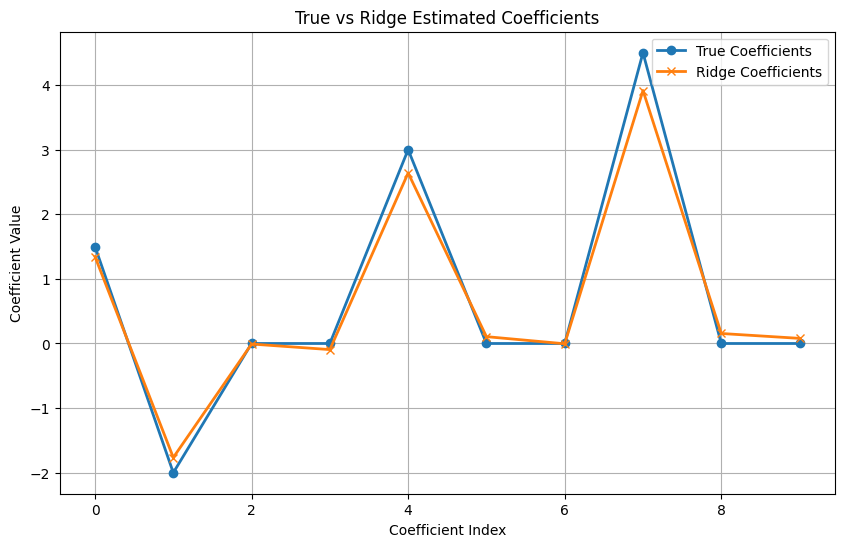

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate some data
np.random.seed(42)
n_samples, n_features = 100, 10
X = np.random.randn(n_samples, n_features)

# Create true coefficients, some of which are 0
true_coef = np.array([1.5, -2, 0, 0, 3, 0, 0, 4.5, 0, 0])

# Generate targets with some noise
y = X.dot(true_coef) + np.random.normal(0, 0.5, size=n_samples)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Ridge (L2) regularization
ridge = Ridge(alpha=10.0)  # Alpha is the regularization parameter
ridge.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the results
print(f"Train MSE: {mse_train:.3f}")
print(f"Test MSE: {mse_test:.3f}")
print("Ridge Coefficients:", ridge.coef_)

# Visualizing the impact of L2 regularization on the coefficients
plt.figure(figsize=(10, 6))
plt.plot(range(len(true_coef)), true_coef, 'o-', label='True Coefficients', linewidth=2)
plt.plot(range(len(ridge.coef_)), ridge.coef_, 'x-', label='Ridge Coefficients', linewidth=2)
plt.title('True vs Ridge Estimated Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()
